### Problem 4
**Language: Python3**

Consider robot trajectory generation using a two-segment spline where each segment is a cubic polynomial (see equation 7.10 of the text). 

a. Sketch the graphs of position, velocity and acceleration for initial angle 0=5.0 deg, the via-point angle v=15.0 deg. and final angle f=40.0 deg. Assume that the duration of each segment is 1.0 sec (i.e. total duration of  2 sec), and the velocity at the via point is to be 17.5 deg/sec. 
    
b. Use the cycloid trajectory, with the same initial 0=5.0 deg and final f=40.0 deg  joint angles, and the total duration of 2 sec. Compare the maximum velocity and acceleration with the two segment cubic polynomial in (a), which trajectory is better and why?

The maximum velocity and acceleration for the cycloid trajectory are a lot more continuous and smooth than the trajectories produced by the spline functions. This is more desireable because it will produce robot movements that are a lot smoother than those produced by the spline calculations.

In [1]:
import plotly.graph_objects as go
import sympy as sp
import numpy as np
import math as math

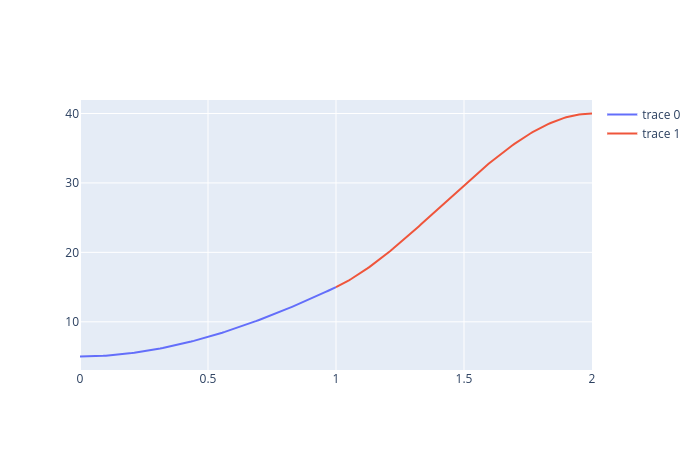

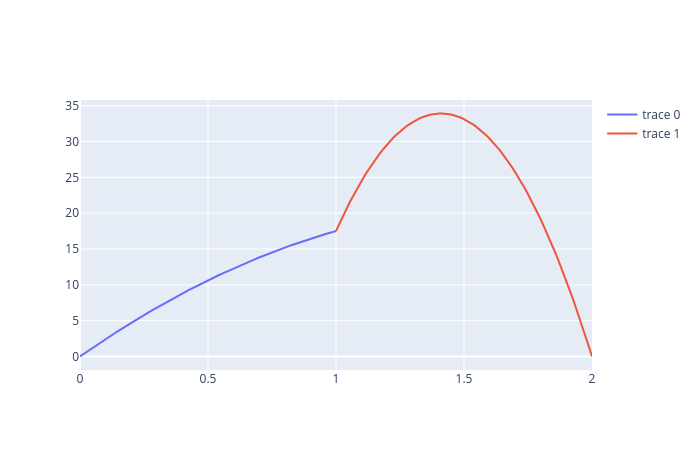

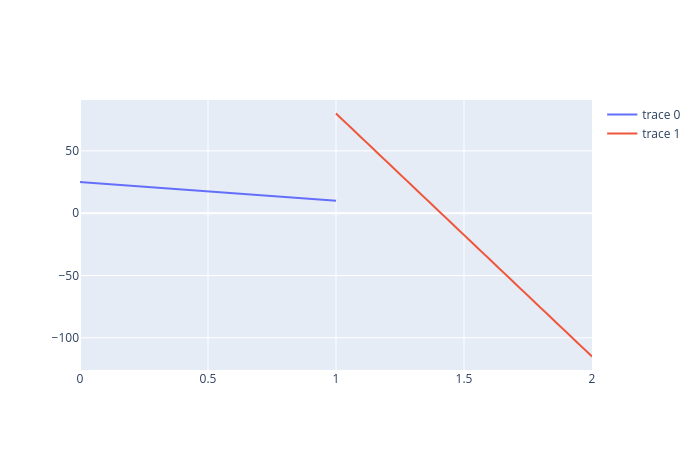

In [2]:
a0, a1, a2, a3, t = sp.symbols('a0 a1 a2 a3 t')

# position plot
pf = a0 + (a1*t) + (a2*t**2) + (a3*t**3)
pfl = sp.lambdify((a0, a1, a2, a3, t), pf, "numpy")

px_one = np.linspace(0,1,100).tolist()
px_two = np.linspace(1,2,100).tolist()
py_one = [ pfl(5, 0, 12.5, -2.5, t) for t in px_one ]
py_two = [ pfl(15, 17.5, 40, -32.5, t-1) for t in px_two ]

position_plot = go.Figure()
position_plot.add_trace(go.Scatter(x=px_one, y=py_one, mode='lines'))
position_plot.add_trace(go.Scatter(x=px_two, y=py_two, mode='lines'))
position_plot.show()

# velocity plot
vf = a1 + 2*a2*t + 3*a3*t**2
vfl = sp.lambdify((a1, a2, a3, t), vf, "numpy")

vx_one = np.linspace(0,1,100).tolist()
vx_two = np.linspace(1,2,100).tolist()
vy_one = [ vfl(0, 12.5, -2.5, t) for t in vx_one ]
vy_two = [ vfl(17.5, 40, -32.5, t-1) for t in vx_two ]

velocity_plot = go.Figure()
velocity_plot.add_trace(go.Scatter(x=vx_one, y=vy_one, mode='lines'))
velocity_plot.add_trace(go.Scatter(x=vx_two, y=vy_two, mode='lines'))
velocity_plot.show()

# acceleration plot
af = 2*a2 + 6*a3*t
afl = sp.lambdify((a1, a2, a3, t), af, "numpy")

ax_one = np.linspace(0,1,100).tolist()
ax_two = np.linspace(1,2,100).tolist()
ay_one = [ afl(0, 12.5, -2.5, t) for t in ax_one ]
ay_two = [ afl(17.5, 40, -32.5, t-1) for t in ax_two ]

acceleration_plot = go.Figure()
acceleration_plot.add_trace(go.Scatter(x=ax_one, y=ay_one, mode='lines'))
acceleration_plot.add_trace(go.Scatter(x=ax_two, y=ay_two, mode='lines'))
acceleration_plot.show()

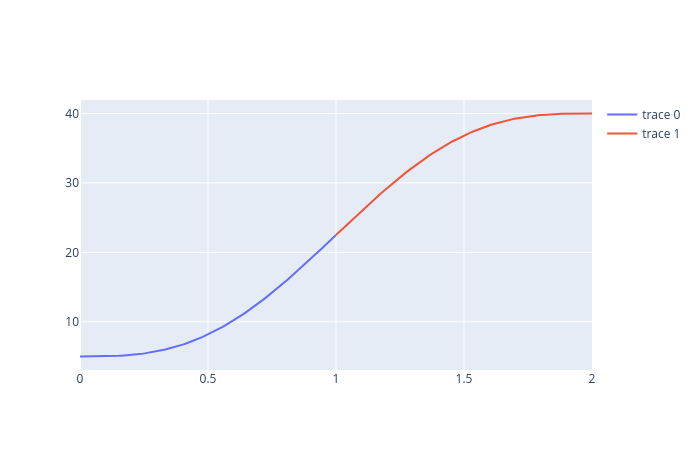

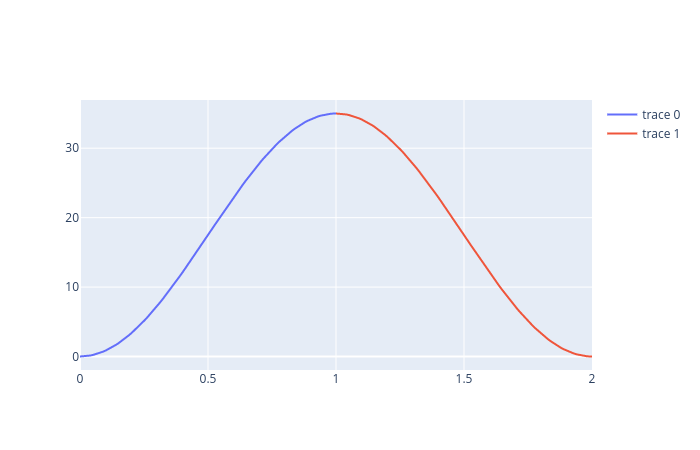

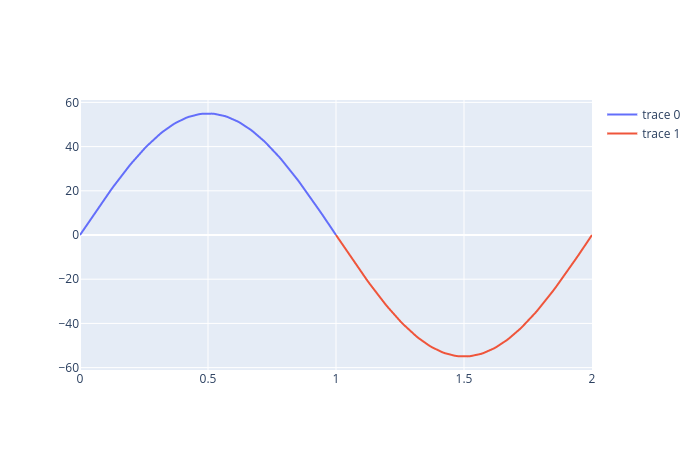

In [3]:
# position plot
pf = 5 + ((t/2)-sp.sin(2*(math.pi)*t/2)/(2*math.pi))*(40-5)
pfl = sp.lambdify(t, pf, "numpy")

px_one = np.linspace(0,1,100).tolist()
px_two = np.linspace(1,2,100).tolist()
py_one = [ pfl(t) for t in px_one ]
py_two = [ pfl(t) for t in px_two ]

position_plot = go.Figure()
position_plot.add_trace(go.Scatter(x=px_one, y=py_one, mode='lines'))
position_plot.add_trace(go.Scatter(x=px_two, y=py_two, mode='lines'))
position_plot.show()

# velocity plot
vf =  ((1/2)-sp.cos(2*math.pi*t/2)/2)*(40-5);
vfl = sp.lambdify(t, vf, "numpy")

vx_one = np.linspace(0,1,100).tolist()
vx_two = np.linspace(1,2,100).tolist()
vy_one = [ vfl(t) for t in vx_one ]
vy_two = [ vfl(t) for t in vx_two ]

velocity_plot = go.Figure()
velocity_plot.add_trace(go.Scatter(x=vx_one, y=vy_one, mode='lines'))
velocity_plot.add_trace(go.Scatter(x=vx_two, y=vy_two, mode='lines'))
velocity_plot.show()

# acceleration plot
af = (sp.sin(2*math.pi*t/2)*2*math.pi/(4))*(35);
afl = sp.lambdify(t, af, "numpy")

ax_one = np.linspace(0,1,100).tolist()
ax_two = np.linspace(1,2,100).tolist()
ay_one = [ afl(t) for t in ax_one ]
ay_two = [ afl(t) for t in ax_two ]

acceleration_plot = go.Figure()
acceleration_plot.add_trace(go.Scatter(x=ax_one, y=ay_one, mode='lines'))
acceleration_plot.add_trace(go.Scatter(x=ax_two, y=ay_two, mode='lines'))
acceleration_plot.show()